In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize


N_CLASSES = 7
sys.path.insert(0, '..')
from models.predict_model import predict

In [10]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'sienna', 'pink', 'yellow', 'black'])
    for i, color in zip(range(N_CLASSES), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for each class')
    plt.legend(loc="lower right")
    plt.show()

In [11]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Loading data...
Predicting with lr...
Making predictions...


Accuracy of lr: 18.41%
Predicting with dt...
Making predictions...
Accuracy of dt: 11.129999999999999%
Predicting with svm...
Scaling data...
Applying PCA...
Making predictions...
Accuracy of svm: 12.19%


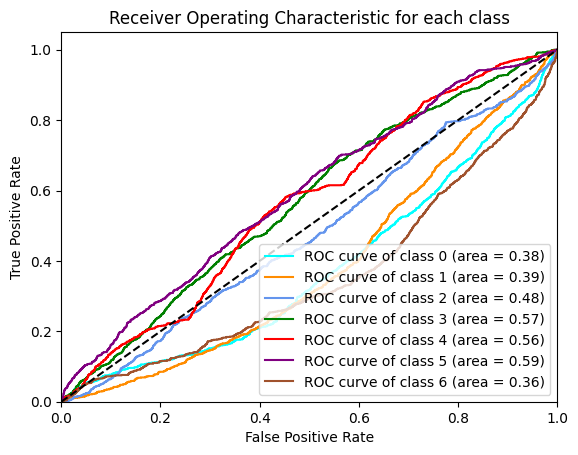

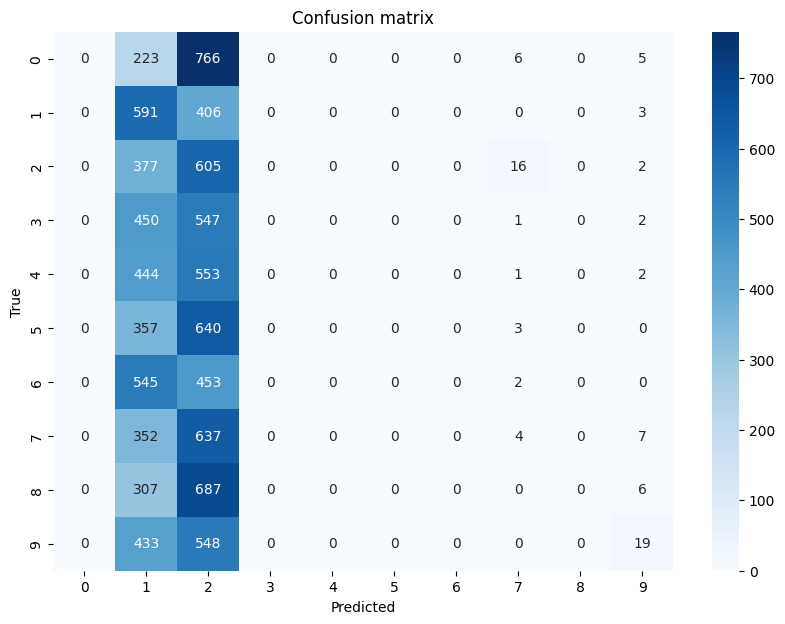

In [12]:
y_pred, y_test, X_test, model = predict()

y_test_bin = label_binarize(y_test, classes=range(N_CLASSES))
y_score = model.decision_function(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(N_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plot_roc_curve(fpr, tpr, roc_auc)

plot_confusion_matrix(y_test, y_pred)